# Distribution of lower and upper trip distances

In [1]:
import setup

In [2]:

def districts(month, location):
    trip_zones = []
    for category in range(2):
        filtered_data = month.loc[(month['trip_distance'] <= month['trip_distance'].mean()) if category == 0 else (month['trip_distance'] >= month['trip_distance'].mean()) & (month['passenger_count'] > 0)]
        trip_counts = filtered_data[location].value_counts()
        district_sums = {district: sum(trip_counts[key] for key in trip_counts.keys() if key in setup.districts[district]) for district in setup.districts}
        trip_zones.append(list(district_sums.values()))

    return trip_zones


def percentages(trip_list):
    return [district / sum(trip_list) * 100 for district in trip_list]


def sum_up(year):
    return setup.np.sum(year, axis=0)


def manhattan(month, direction):
    return [
        month.loc[(month[direction].isin(setup.districts['manhattan'])) & (month['trip_distance'] <= month['trip_distance'].mean()) & (month['passenger_count'] > 0)][direction].value_counts(),
        month.loc[(month[direction].isin(setup.districts['manhattan'])) & (month['trip_distance'] >= month['trip_distance'].mean()) & (month['passenger_count'] > 0)][direction].value_counts()
    ]


def center(center):
    return [[key for key in center.loc[(center >= category) & (center < category + 1)].keys()] for category in range(6)]


def year_average(title, trips):
    print(f'-------------------- {title} --------------------')
    print(percentages(sum_up(trips)), '\n\n')

    for index, month_label in enumerate(setup.month_labels):
        print(f'-------------------- {month_label} --------------------')
        print(percentages(trips[index]), '\n')


def monthly_result(title, trips):
    fig, ax = setup.plt.subplots(figsize=(10, 10))
    ax.pie(percentages(sum_up(trips)), colors=setup.district_colors)
    ax.set_title(title)
    ax.legend(setup.district_labels, loc=3)
    setup.plt.show()


def center_result(center):
    for index, category in enumerate(center):
        print(f'---------- Category {index} ----------')
        print(category, '\n')

# PULocationID
#### Distribution of lower and upper distance trips based on the customer pickups

-------------------- year average - lower distance trips --------------------
[0.0792713723535675, 0.9546573347174896, 97.83223147214075, 1.1312118785123075, 0.0026279422758886295] 


-------------------- January --------------------
[0.07367827629867103, 0.9080867004253734, 97.93048847530159, 1.0847745203559773, 0.0029720276183835626] 

-------------------- February --------------------
[0.0651274067068567, 0.8773369448850392, 98.02843496341778, 1.027217639332798, 0.0018830456575262655] 

-------------------- March --------------------
[0.08200157298431505, 1.0283282931371125, 97.76846696995297, 1.1191188722553669, 0.002084291670237656] 

-------------------- April --------------------
[0.07698022049902319, 0.9815198898196675, 97.87646455605447, 1.0629893966001824, 0.0020459370266470785] 

-------------------- May --------------------
[0.07667982996347607, 1.0130884078034936, 97.77850496087864, 1.1296695737217142, 0.002057227632681562] 

-------------------- June --------------------


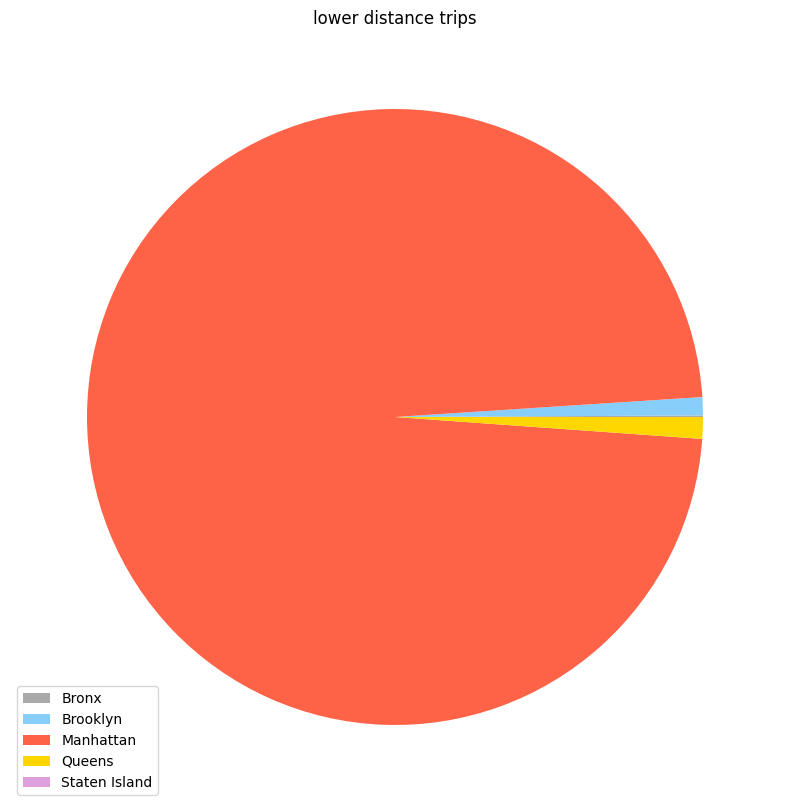

-------------------- year average - upper distance trips --------------------
[0.25724791180725176, 2.266439344842035, 75.59407675226038, 21.87277669935326, 0.009459291737076821] 


-------------------- January --------------------
[0.12173916262334708, 1.9261717452241325, 76.92272455114757, 21.024968790169066, 0.004395750835886725] 

-------------------- February --------------------
[0.1157290656024239, 1.8705099965336303, 78.82126003459034, 19.189841519040275, 0.0026593842333362066] 

-------------------- March --------------------
[0.19507146484739413, 2.1767850314967414, 77.35673354233549, 20.26534404615785, 0.006065915162528876] 

-------------------- April --------------------
[0.22010327791792536, 2.2206117335521856, 75.37487939108172, 22.178945671174233, 0.005459926273933032] 

-------------------- May --------------------
[0.2432031295439026, 2.326348872627477, 74.59610831909802, 22.827360244366368, 0.006979434364236] 

-------------------- June --------------------
[0.242963

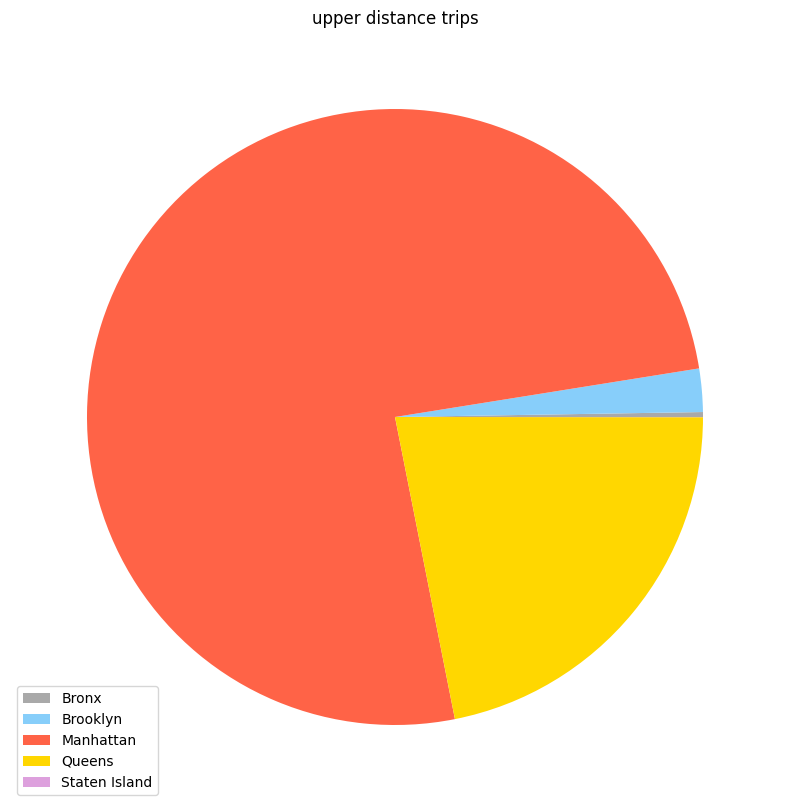

In [3]:
lower_trips = [districts(month, 'PULocationID')[0] for month in setup.year]
upper_trips = [districts(month, 'PULocationID')[1] for month in setup.year]

year_average('year average - lower distance trips', lower_trips)
monthly_result('lower distance trips', lower_trips)
year_average('year average - upper distance trips', upper_trips)
monthly_result('upper distance trips', upper_trips)

#### Center of Manhattan based on the customer pickups divided by lower and upper distance trips

In [4]:
center_result(center(sum([manhattan(month, 'PULocationID')[0] / manhattan(month, 'PULocationID')[0].sum() * 100 for month in setup.year]) / 12))


---------- Category 0 ----------
[4, 12, 13, 24, 41, 42, 45, 50, 74, 75, 87, 88, 105, 116, 120, 125, 127, 128, 151, 152, 153, 166, 194, 202, 209, 211, 224, 232, 243, 244, 261] 

---------- Category 1 ----------
[43, 113, 114, 137, 140, 143, 144, 148, 158, 231, 233, 246, 262] 

---------- Category 2 ----------
[68, 79, 90, 100, 107, 141, 164, 229, 238, 249, 263] 

---------- Category 3 ----------
[48, 142, 163, 170, 186, 230, 234, 239] 

---------- Category 4 ----------
[161, 162, 236] 

---------- Category 5 ----------
[237] 



![](../assets/lower_pu_manhatten.jpg?raw=true)

In [5]:
center_result(center(sum([manhattan(month, 'PULocationID')[1] / manhattan(month, 'PULocationID')[1].sum() * 100 for month in setup.year])/12))

---------- Category 0 ----------
[4, 12, 24, 41, 42, 45, 74, 75, 116, 120, 125, 127, 128, 143, 152, 153, 166, 194, 202, 209, 224, 232, 243, 244] 

---------- Category 1 ----------
[43, 50, 88, 90, 113, 114, 137, 141, 144, 151, 158, 211, 229, 233, 238, 246, 261, 262, 263] 

---------- Category 2 ----------
[13, 68, 87, 100, 107, 140, 142, 148, 163, 164, 170, 234, 236, 237, 239, 249] 

---------- Category 3 ----------
[48, 79, 161, 162, 186, 231] 

---------- Category 4 ----------
[230] 

---------- Category 5 ----------
[] 



![](../assets/upper_pu_manhatten.jpg?raw=true)

# DOLocationID
#### Distribution of lower and upper distance trips based on the customer dropoffs


-------------------- year average - lower distance trips --------------------
[0.11982715141291798, 1.1774738898479746, 97.4975184078333, 1.2026314050432987, 0.002549145862512084] 


-------------------- January --------------------
[0.11184064471416628, 1.0950098627633418, 97.65871032620524, 1.1314563348427187, 0.0029828314745270076] 

-------------------- February --------------------
[0.10013613522171046, 1.057912821266724, 97.77136317243206, 1.0685618081298938, 0.0020260629496137595] 

-------------------- March --------------------
[0.1253691704463425, 1.219017292535194, 97.47214370077394, 1.1812581238596769, 0.0022117123848472676] 

-------------------- April --------------------
[0.11772835988319443, 1.1975466303195785, 97.54867278613156, 1.1340391451204812, 0.0020130785451819315] 

-------------------- May --------------------
[0.12196394158379355, 1.2661110170350556, 97.39810750499367, 1.2116010848200551, 0.0022164515674302195] 

-------------------- June --------------------


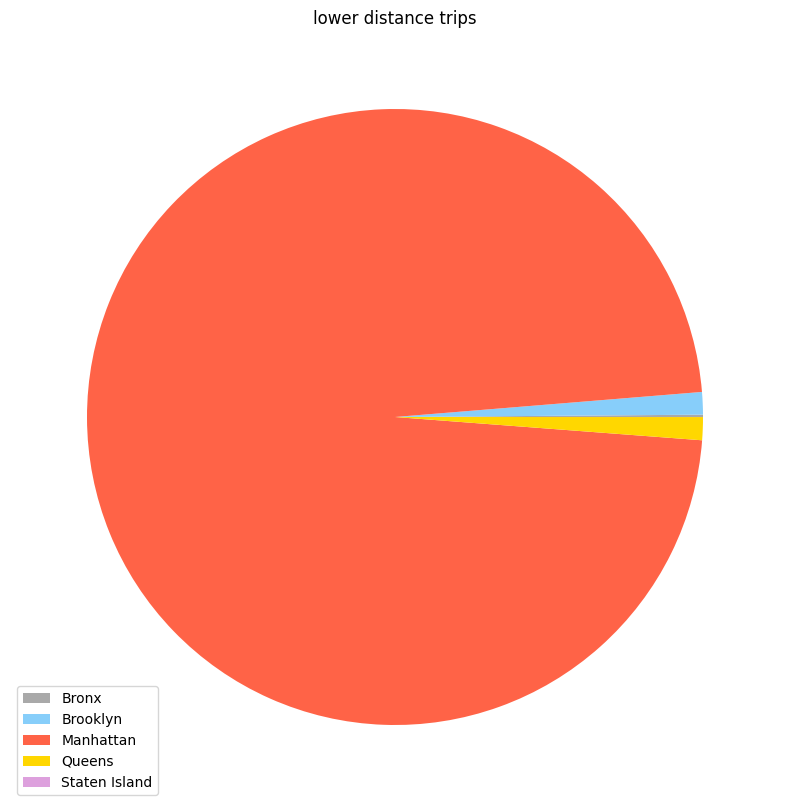

-------------------- year average - upper distance trips --------------------
[2.2471823422788044, 13.569862613900623, 68.2175086304463, 15.833317732877534, 0.13212868049673837] 


-------------------- January --------------------
[2.039649176219862, 13.372709282310097, 69.76058267661213, 14.71352123561166, 0.1135376292462441] 

-------------------- February --------------------
[1.9235227030385076, 12.706144702315274, 70.93927621025693, 14.327578373466606, 0.10347801092267894] 

-------------------- March --------------------
[2.1623873346066307, 13.183244178522074, 68.94763985891744, 15.583283504671888, 0.12344512328197062] 

-------------------- April --------------------
[2.234673575568491, 13.54752485047786, 68.42600745092902, 15.671242776752653, 0.12055134627196365] 

-------------------- May --------------------
[2.3330021475351863, 13.787849050962544, 67.22755524122289, 16.52592363027426, 0.12566993000512733] 

-------------------- June --------------------
[2.300497316569385, 

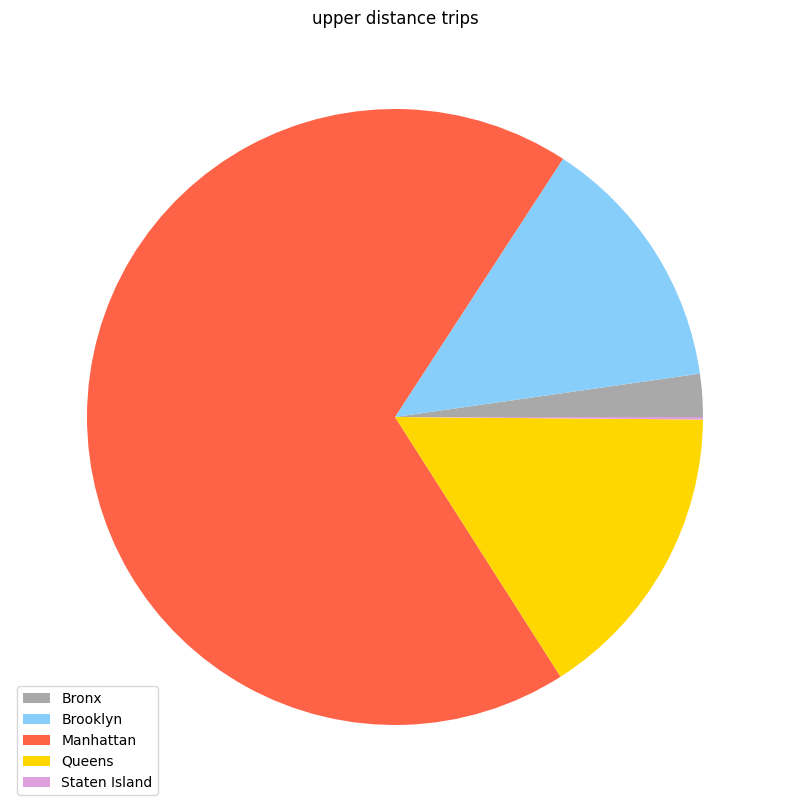

In [6]:
lower_trips = [districts(month, 'DOLocationID')[0] for month in setup.year]
upper_trips = [districts(month, 'DOLocationID')[1] for month in setup.year]

year_average('year average - lower distance trips', lower_trips)
monthly_result('lower distance trips', lower_trips)
year_average('year average - upper distance trips', upper_trips)
monthly_result('upper distance trips', upper_trips)

#### Center of Manhattan based on the customer dropoffs devided by lower and upper distance trips

In [7]:
center_result(center(sum([manhattan(month, 'DOLocationID')[0] / manhattan(month, 'DOLocationID')[0].sum() * 100 for month in setup.year]) / 12))


---------- Category 0 ----------
[4, 12, 13, 24, 41, 42, 45, 74, 87, 88, 105, 116, 120, 125, 127, 128, 144, 151, 152, 153, 166, 194, 202, 209, 211, 224, 232, 243, 244, 261] 

---------- Category 1 ----------
[43, 50, 75, 90, 100, 113, 114, 137, 143, 148, 158, 231, 233, 249, 262] 

---------- Category 2 ----------
[68, 79, 107, 140, 141, 163, 164, 229, 238, 239, 246, 263] 

---------- Category 3 ----------
[48, 142, 162, 170, 186, 230, 234] 

---------- Category 4 ----------
[161, 236, 237] 

---------- Category 5 ----------
[] 



![](../assets/lower_do_manhatten.jpg?raw=true)

In [8]:
center_result(center(sum([manhattan(month, 'DOLocationID')[1] / manhattan(month, 'DOLocationID')[1].sum() * 100 for month in setup.year])/12))

---------- Category 0 ----------
[4, 12, 24, 45, 90, 105, 114, 120, 125, 127, 128, 152, 153, 158, 194, 202, 209, 224, 232, 243] 

---------- Category 1 ----------
[41, 42, 43, 50, 68, 74, 75, 88, 100, 107, 113, 116, 137, 142, 143, 144, 148, 151, 164, 166, 186, 211, 229, 233, 234, 237, 244, 246, 249, 261, 262] 

---------- Category 2 ----------
[48, 79, 87, 140, 141, 161, 162, 163, 170, 238, 239, 263] 

---------- Category 3 ----------
[13, 230, 231, 236] 

---------- Category 4 ----------
[] 

---------- Category 5 ----------
[] 



![](../assets/upper_do_manhatten.jpg?raw=true)